## AutoARIMA

- Univariate
- The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, setting on a single fitted ARIMA model. Accept only univariate dataset.
- AR(auto regression model) MA(moving average model) -> ARMA
- ARIMA: Auto Regressive Integrated Moving Average

In [1]:
from darts import TimeSeries
from darts.models import StatsForecastAutoARIMA
from darts.utils.statistics import plot_hist
from darts.metrics import mape
import pandas as pd
import numpy as np
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr
from darts.dataprocessing.transformers import Scaler


In [2]:
df = pd.read_csv('../../../data/prepared/df_energy_climate_2020.csv')

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df['day_of_week'] = df['datetime'].dt.dayofweek

In [5]:
series_price = TimeSeries.from_dataframe(df, 
                                   time_col="datetime",
                                   value_cols=["energy_price"])
series_wind = TimeSeries.from_dataframe(df, 
                                   time_col="datetime",
                                   value_cols=["wind_speed"])

In [6]:
encoders = {
    "datetime_attribute": {"future": ["time", "day_of_week", 'month']},
    'transformer': Scaler()
}

In [7]:
splitting_point = (int(len(series_price)*0.20))
train_price, val_price = series_price[:-splitting_point], series_price[-splitting_point:]

In [8]:
model = StatsForecastAutoARIMA(
    add_encoders=encoders,
)

In [9]:
model.fit(train_price)

TypeError: float() argument must be a string or a number, not 'datetime.time'

In [ ]:

forecast = model.predict(len(val_price))
print(f'model {model} obtains MAPE: {mape(val, forecast):.2f}%')

## Historical forecasts
Forecasting using historical data.

*Backtesting: General method for seeing how well a model would have done using historical data.

In [ ]:
historical_fcast = model.historical_forecasts(
    series,
    start=0.80,
    forecast_horizon=168,
    stride=5,
    overlap_end=False,
    verbose=True
)

In [ ]:
series.plot(label='data')
historical_fcast.plot(label='backtest 1 week ahead (AutoARIMA)')

In [ ]:
print(f'MAPE = {mape(historical_fcast, series):.2f}%')

## Backtest
It repeatedly builds a training set from the beginning of series. It trains the current model on the training set, emits a forecast of length equal to forecast_horizon, and then moves the end of the training set forward by stride time steps.

In [ ]:
raw_errors = model.backtest(
    series,
    start=0.80,
    forecast_horizon=168,
    stride=5,
    reduction=None,
    metric=mape,
    verbose=True
)

In [ ]:
plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title='individual backtest error scores (histogram)'
)

In [ ]:
median_error = model.backtest(
    series,
    start=0.8,
    forecast_horizon=168,
    stride=5,
    reduction=np.median,
    metric=mape,
    verbose=True
)

In [ ]:
print(f'Median error (MAPE) over all historical forecasts: {median_error:.2f}%')

In [ ]:
average_error = model.backtest(
    series,
    start=0.8,
    forecast_horizon=168,
    stride=5,
    reduction=np.mean,
    metric=mape,
    verbose=True
)

In [ ]:
print(f'Average error (MAPE) over all historical forecasts: {average_error:.2f}%')

## Covariates

In [ ]:
df.head(2)

,datetime,wind_speed,solar_radiation,temperature,date,day_of_week,time,month,nuclear_power,not_renewable,renewable,energy_price,total_energy_feeding
0,2020-01-01 00:00:00,2.4,0,-0.1,2020-01-01,2,00:00:00,1,8088.21750,29512.74850,14541.30200,38.60,52142.26800
1,2020-01-01 01:00:00,2.4,0,-0.5,2020-01-01,2,01:00:00,1,8081.15875,29178.66275,14949.45575,36.55,52209.27725


In [ ]:
splitting_point = (int(len(series_price)*0.20))

# Set aside the second half of series as a validation series
train_price, val_price = series_price[:-splitting_point], series_price[-splitting_point:]

train_wind, val_wind = series_wind[:-splitting_point], series_wind[-splitting_point:]

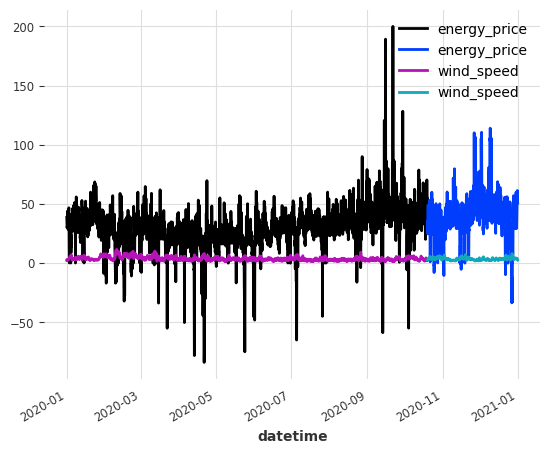

In [ ]:
train_price.plot()
val_price.plot()
train_wind.plot()
val_wind.plot()

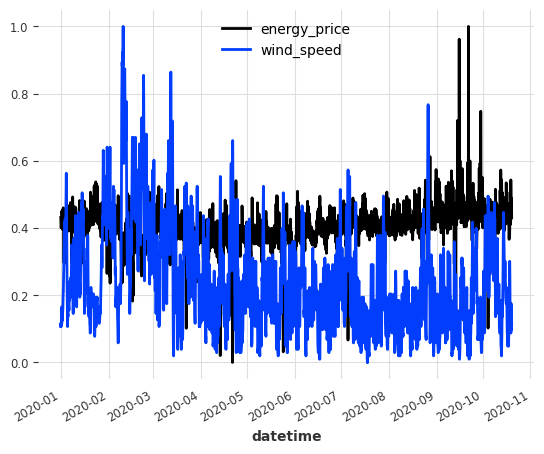

In [ ]:
scaler = Scaler()
train_price_scaled, train_wind_scaled = scaler.fit_transform([train_price, train_wind])

train_price_scaled.plot()
train_wind_scaled.plot()

In [ ]:
encoders = {
    "datetime_attribute": {"future": ["time", "month", 'day_of_week']},
    "position": { "future": ["relative"]},
}

In [ ]:
model = StatsForecastAutoARIMA()

In [ ]:
model.fit(
    train_price_scaled
)

NameError: name 'train_price_scaled' is not defined